# MULTIPLE LINEAR REGRESSION - Assignment 5

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1) Consider only the below columns and prepare a prediction model for predicting price. Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight

Step 1 - Importing and Reading the dataset

In [2]:
Corolla = pd.read_csv('ToyotaCorolla.csv',encoding= 'unicode_escape')
Corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
Corolla_Df = Corolla[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
Corolla_Df.dropna()
Corolla_Df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [4]:
Corolla_Df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


Step 2 - Visualization of the given dataset

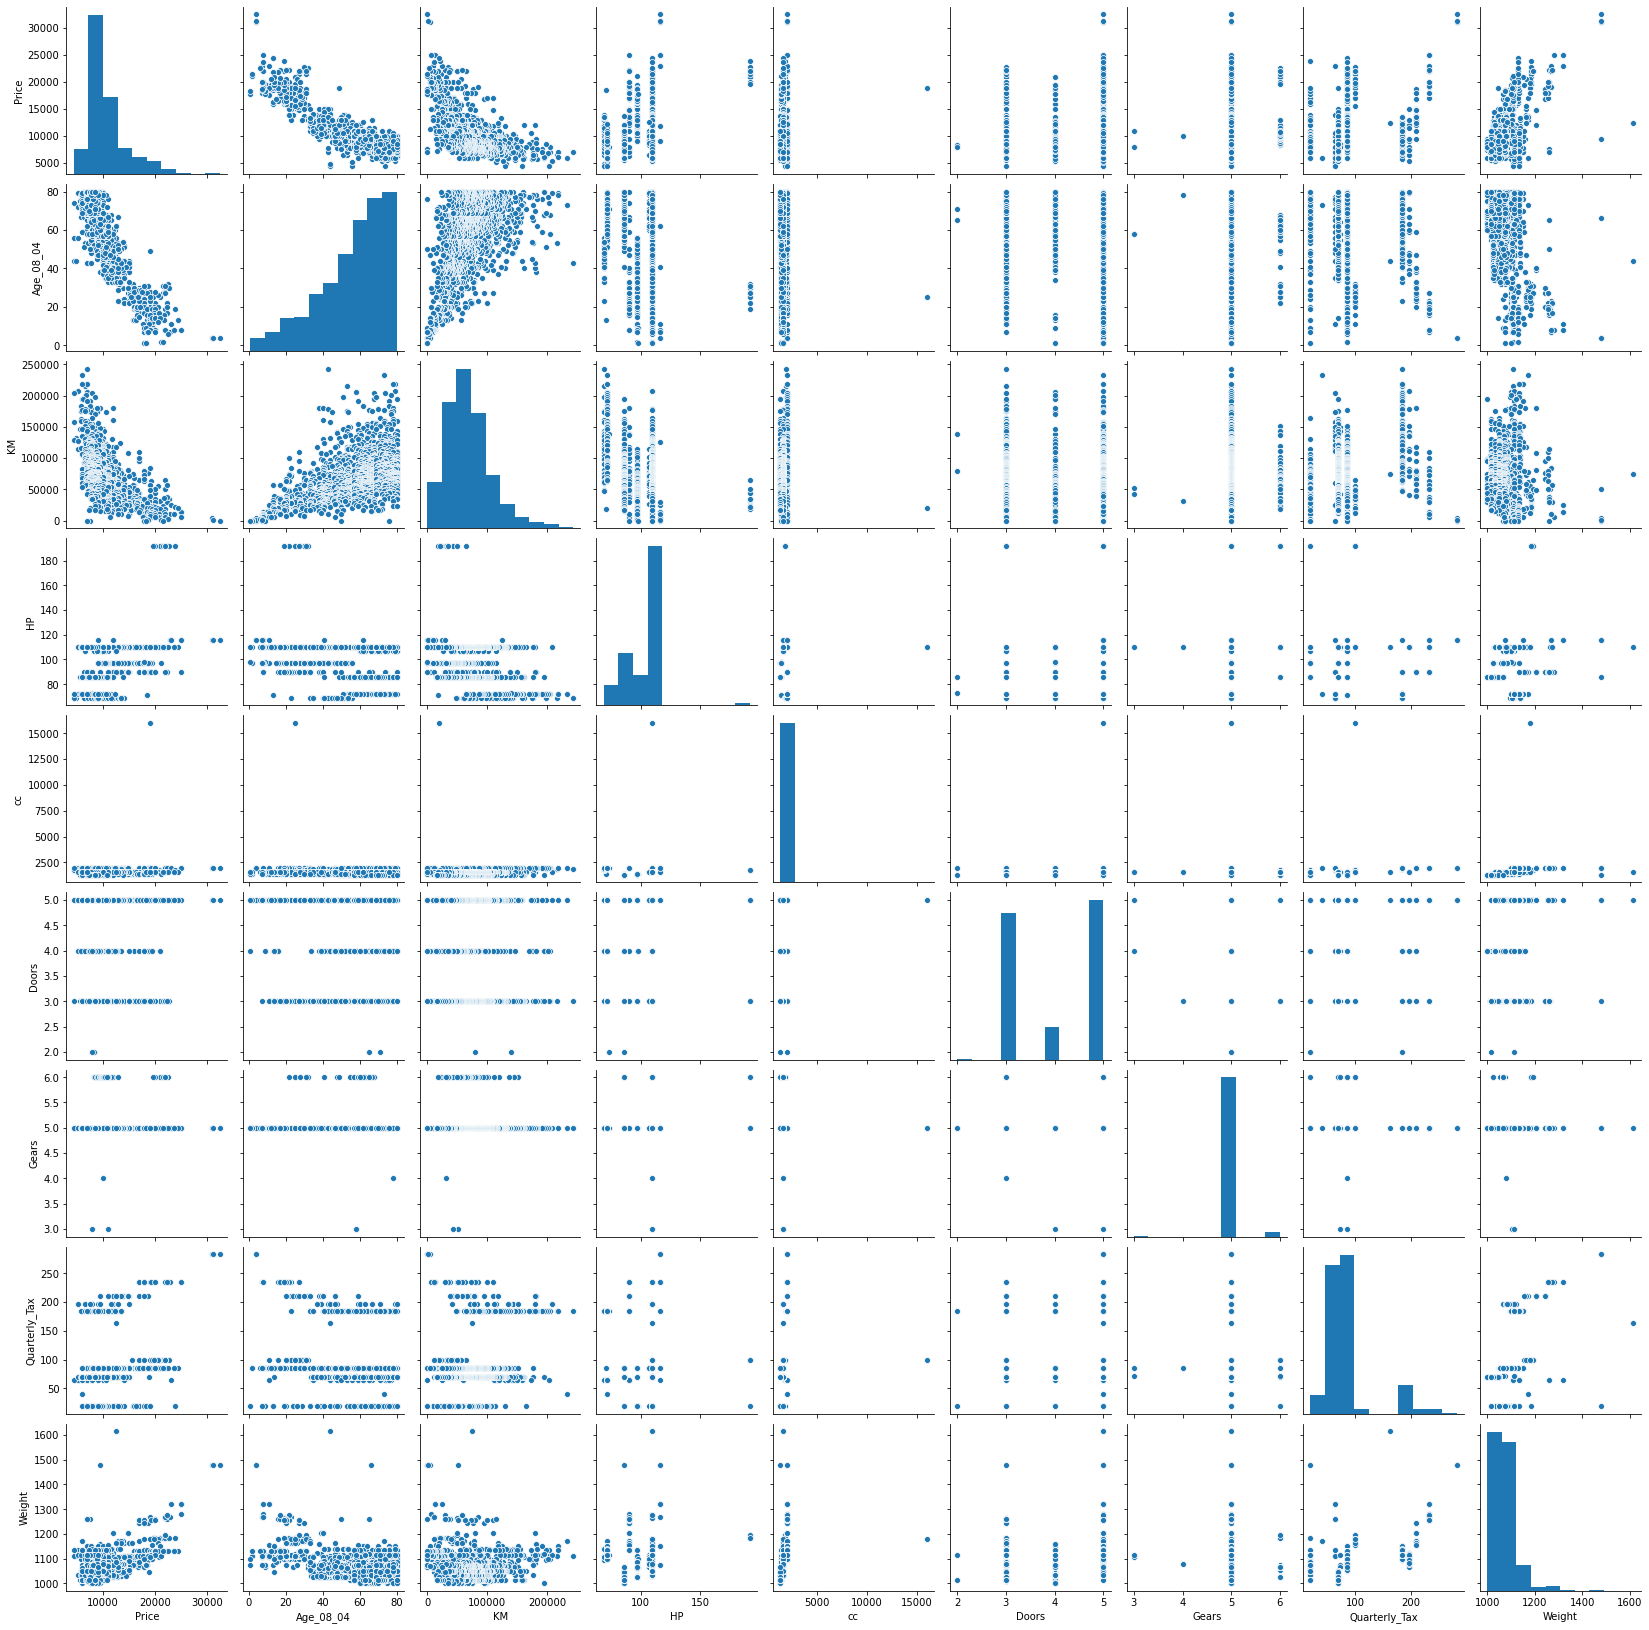

In [7]:
sns.pairplot(Corolla_Df.iloc[:,0:9])

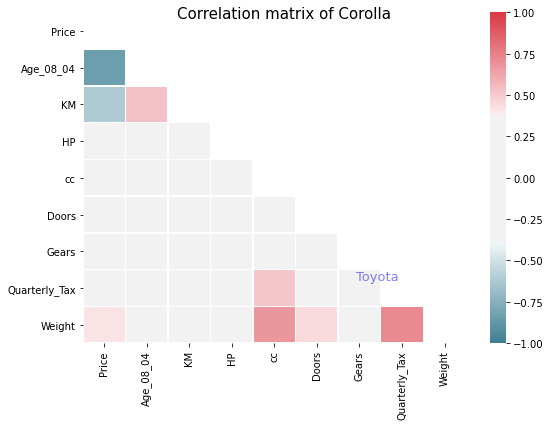

In [6]:
df = Corolla_Df.iloc[:,0:9]
corr = df.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


fig, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of Corolla', fontsize=15)
ax.text(0.77, 0.2, 'Toyota', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='blue', alpha=0.5)

fig.tight_layout()

Step 3 - Creation of Machine Learning Model

3.1 Creation of model using Statsmodels

In [10]:
# Considering all the variables and creating the model
model1=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Corolla_Df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:07:36   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#Considering Age_08_04 only --0.768
model_age = smf.ols('Price~Age_08_04',data=Corolla_Df).fit()
model_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:07:56   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age_08_04   -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#Considering KM only --0.325
model_km = smf.ols('Price~KM',data=Corolla_Df).fit()
model_km.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          1.76e-124
Time:                        12:08:08   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
KM            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#Considering HP only --0.099
model_hp = smf.ols('Price~HP',data=Corolla_Df).fit()
model_hp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     158.0
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.93e-34
Time:                        12:08:26   Log-Likelihood:                -13732.
No. Observations:                1436   AIC:                         2.747e+04
Df Residuals:                    1434   BIC:                         2.748e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2990.2764    622.568      4.803      0.000    1769.035    4211.518
HP            76.2600      6.068     12.568      0.000      64.357      88.163
==============================================================================
Omnibus:                      448.876   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.172
Skew:                           1.591   Prob(JB):                    6.43e-289
Kurtosis:                       6.472   Cond. No.                         703.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#Considering cc only --0.016
model_cc = smf.ols('Price~cc',data=Corolla_Df).fit()
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.55e-06
Time:                        12:08:37   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#Considering Doors only --.034
model_doors = smf.ols('Price~Doors',data=Corolla_Df).fit()
model_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.46e-12
Time:                        12:08:50   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#Considering Gears only  --- 0.004
model_gears = smf.ols('Price~Gears',data=Corolla_Df).fit()
model_gears.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.733
Date:                Tue, 22 Dec 2020   Prob (F-statistic):             0.0168
Time:                        12:09:03   Log-Likelihood:                -13804.
No. Observations:                1436   AIC:                         2.761e+04
Df Residuals:                    1434   BIC:                         2.762e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4628.0652   2550.553      1.815      0.070    -375.149    9631.280
Gears       1214.1261    507.069      2.394      0.017     219.450    2208.802
==============================================================================
Omnibus:                      483.564   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1509.458
Skew:                           1.698   Prob(JB):                         0.00
Kurtosis:                       6.700   Cond. No.                         140.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#Considering Quarterly_Tax only --0.00
model_tax = smf.ols('Price~Quarterly_Tax',data=Corolla_Df).fit()
model_tax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     72.38
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           4.41e-17
Time:                        12:09:16   Log-Likelihood:                -13771.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1434   BIC:                         2.756e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9046.7382    218.889     41.330      0.000    8617.362    9476.115
Quarterly_Tax    19.3301      2.272      8.507      0.000      14.873      23.787
==============================================================================
Omnibus:                      369.212   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.513
Skew:                           1.417   Prob(JB):                    6.82e-184
Kurtosis:                       5.462   Cond. No.                         226.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#Considering weight  only --0.33
model_weight = smf.ols('Price~Weight',data=Corolla_Df).fit()
model_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     731.5
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          1.63e-130
Time:                        12:09:25   Log-Likelihood:                -13511.
No. Observations:                1436   AIC:                         2.703e+04
Df Residuals:                    1434   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.222e+04   1589.807    -20.264      0.000   -3.53e+04   -2.91e+04
Weight        40.0444      1.481     27.046      0.000      37.140      42.949
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.408
Skew:                           0.028   Prob(JB):                    4.04e-116
Kurtosis:                       5.980   Cond. No.                     2.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# Creating a model with Ag_08_04,KM,Weight--0.790
model2 = smf.ols('Price~Age_08_04+KM',data=Corolla_Df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2695.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:09:36   Log-Likelihood:                -12686.
No. Observations:                1436   AIC:                         2.538e+04
Df Residuals:                    1433   BIC:                         2.539e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.048e+04    140.047    146.259      0.000    2.02e+04    2.08e+04
Age_08_04   -154.1492      2.736    -56.334      0.000    -159.517    -148.782
KM            -0.0165      0.001    -12.130      0.000      -0.019      -0.014
==============================================================================
Omnibus:                      448.686   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3322.042
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                      10.019   Cond. No.                     2.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# Creating a model with Ag_08_04,Weight
model3 = smf.ols('Price~Age_08_04+Weight',data=Corolla_Df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     2959.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:09:49   Log-Likelihood:                -12633.
No. Observations:                1436   AIC:                         2.527e+04
Df Residuals:                    1433   BIC:                         2.529e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3149.7074   1052.897      2.991      0.003    1084.324    5215.091
Age_08_04   -151.0391      2.577    -58.610      0.000    -156.094    -145.984
Weight        14.9482      0.911     16.417      0.000      13.162      16.734
==============================================================================
Omnibus:                      150.983   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              949.444
Skew:                          -0.249   Prob(JB):                    6.77e-207
Kurtosis:                       6.952   Cond. No.                     2.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

3.2 Creation of model using Sklearn

In [23]:
X = Corolla_Df[['Age_08_04','Weight']].values.reshape(-1,2)
Y = Corolla_Df['Price']

# Prepare model data point for visualization #

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of input values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Train #

ols = LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

# Evaluate #

r2 = model.score(X, Y)
print(r2*100)

80.50715736932419


3.3 Creation of model using Lasso

In [24]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)
reg = Lasso(alpha=0.5)
reg.fit(X_train, y_train)

print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)
       
    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)

Lasso Regression: R^2 score on training set 80.11557569762905
Lasso Regression: R^2 score on test set 81.3749017782722


Creation of model using Ridge

In [25]:
from sklearn.linear_model import Ridge
ridge = Ridge(normalize = True)
coefs = []
alphas = 10**np.linspace(10,-2,100)*0.5
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 2)

Step 4 - Visualization for the Pedicted model

Visualisation for the sklearn linear regression

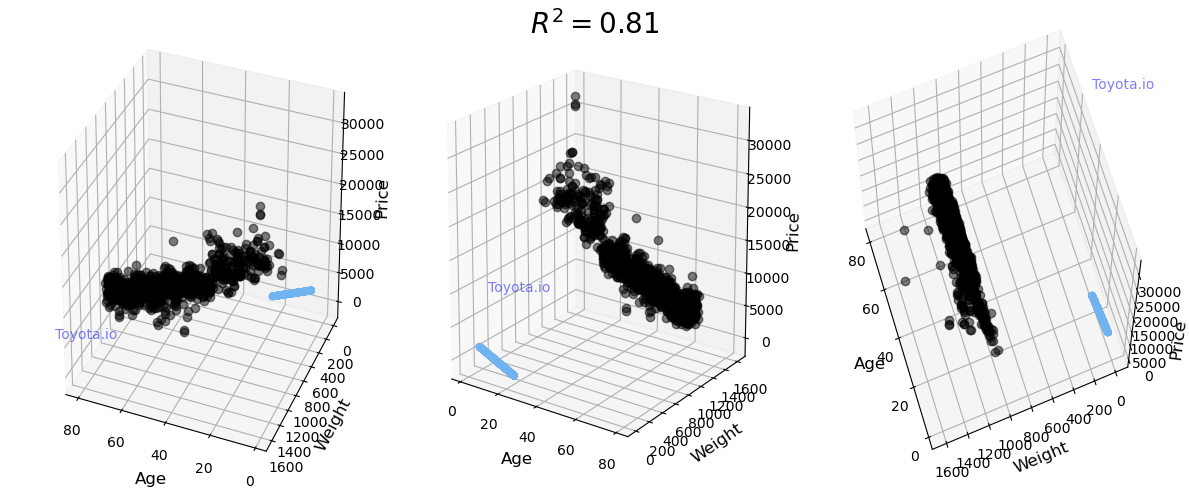

In [26]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Age', fontsize=12)
    ax.set_ylabel('Weight', fontsize=12)
    ax.set_zlabel('Price', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'Toyota.io', fontsize=10, ha='center', va='center',
           transform=ax1.transAxes, color='blue', alpha=0.5)
ax2.text2D(0.3, 0.42, 'Toyota.io', fontsize=10, ha='center', va='center',
           transform=ax2.transAxes, color='blue', alpha=0.5)
ax3.text2D(0.85, 0.85, 'Toyota.io', fontsize=10, ha='center', va='center',
           transform=ax3.transAxes, color='blue', alpha=0.5)

ax1.view_init(elev=30, azim=112)
ax2.view_init(elev=18, azim=-55)
ax3.view_init(elev=65, azim=160)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

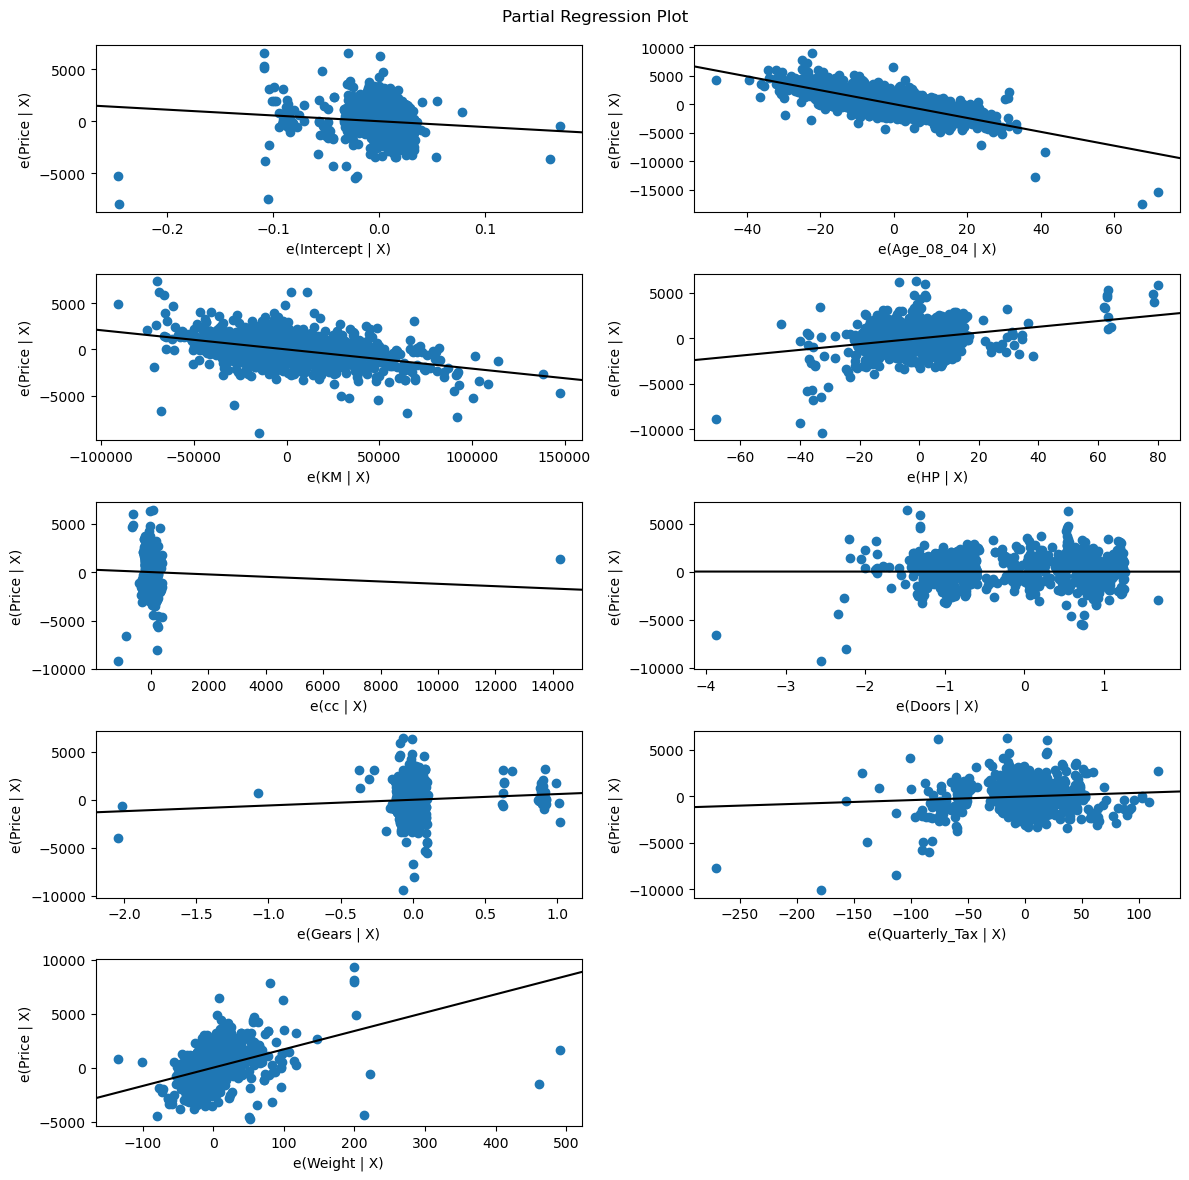

In [27]:
fig = plt.figure(figsize=(12,12))
fig = sm.graphics.plot_partregress_grid(model1, fig=fig)

# 2) Prepare a prediction model for profit of 50_startups data

Step 1 - Importing and Reading the Dataset

In [28]:
Startups=pd.read_csv('50_Startups.csv')
Startups.dropna()
Startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [29]:
Startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Step 2 - Visualization for the given dataset

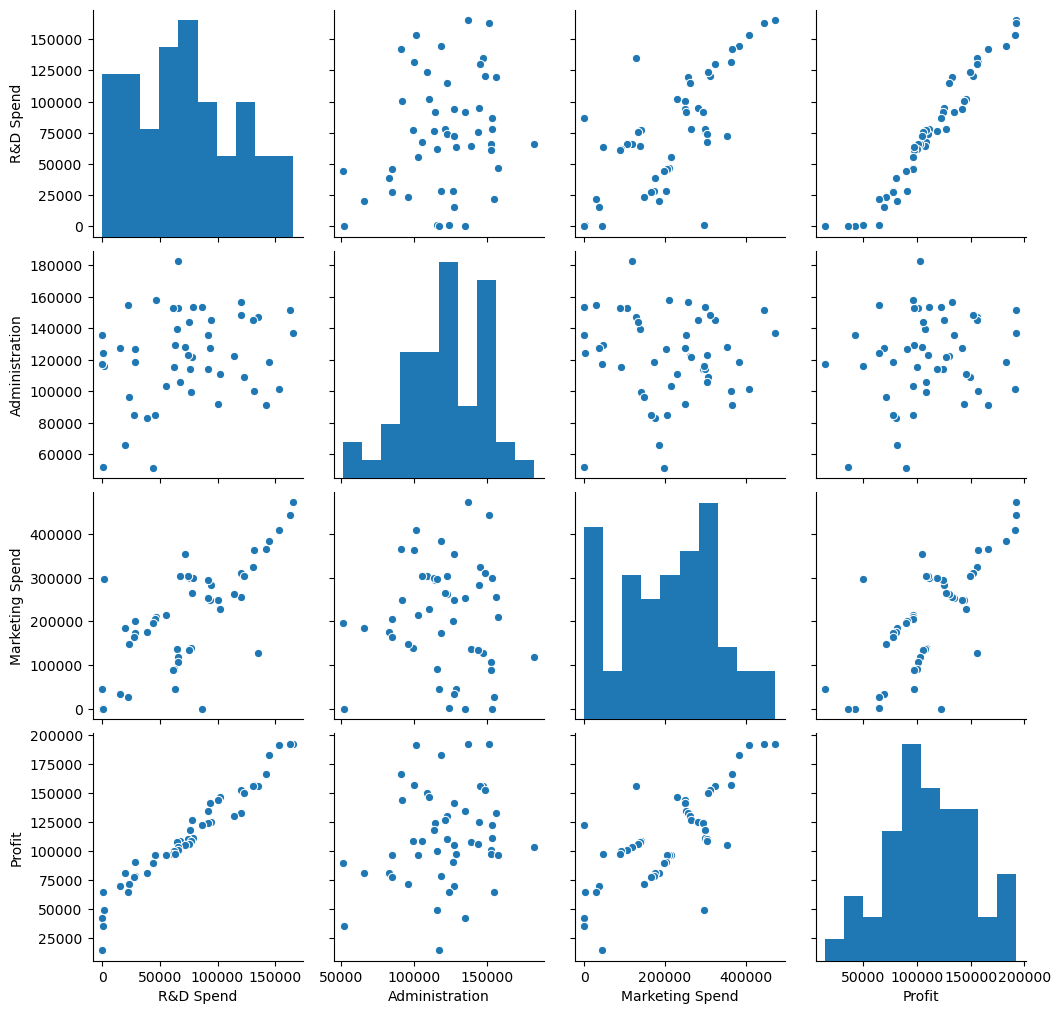

In [30]:
sns.pairplot(Startups.iloc[:,0:5])

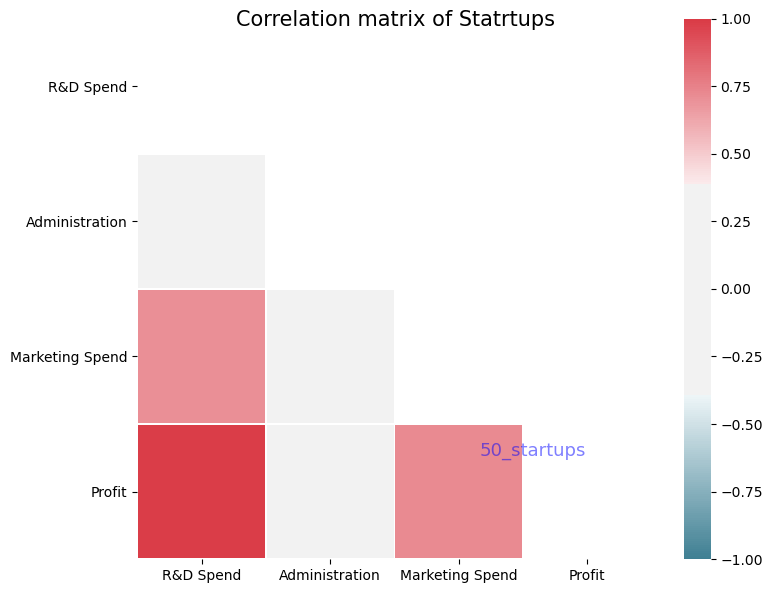

In [31]:
df = Startups.iloc[:,0:6]
corr = df.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of Statrtups', fontsize=15)
ax.text(0.77, 0.2, '50_startups', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='blue', alpha=0.5)

fig.tight_layout()


1. Linearity
2. Homoscedascity
3. Multivariate normality
4. Independance of errors
5. Lack of multicollinearity

In [33]:
df=Startups.rename(columns={'R&D Spend': 'RnD_Spend', 'Marketing Spend': 'Marketing_Spend'})
df.head()

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Step 3 - Creation of machine learning models

Model creation using Statsmodels

In [35]:
# Creating a model with all values
model1 = smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           4.53e-30
Time:                        12:15:38   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#Creating a model with RnD_Spend and Marketing Spend
model2 = smf.ols('Profit~RnD_Spend+Marketing_Spend',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           2.16e-31
Time:                        12:15:59   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RnD_Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_new = sm.add_constant(np.arange(10).reshape((-1, 2)))
print(x_new)
y_new = model1.predict(x_new)
print(y_new)

[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]


Creation of model using Sklearn

In [38]:
X = df[['RnD_Spend','Marketing_Spend']].values.reshape(-1,2)
Y = df['Profit']

# Prepare model data point for visualization #

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of input values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Train #

ols = LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

# Evaluate #

r2 = model.score(X, Y)
print(r2*100)


95.04503015559763
ERROR! Session/line number was not unique in database. History logging moved to new session 36


In [39]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)
reg = Lasso(alpha=0.5)
reg.fit(X_train, y_train)

print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)
       
    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)

Lasso Regression: R^2 score on training set 93.10316380873236
Lasso Regression: R^2 score on test set 98.73683228404708


In [40]:
from sklearn.linear_model import Ridge
ridge = Ridge(normalize = True)
coefs = []
alphas = 10**np.linspace(10,-2,100)*0.5
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 2)

Step 4 - Visualization for the predicted model

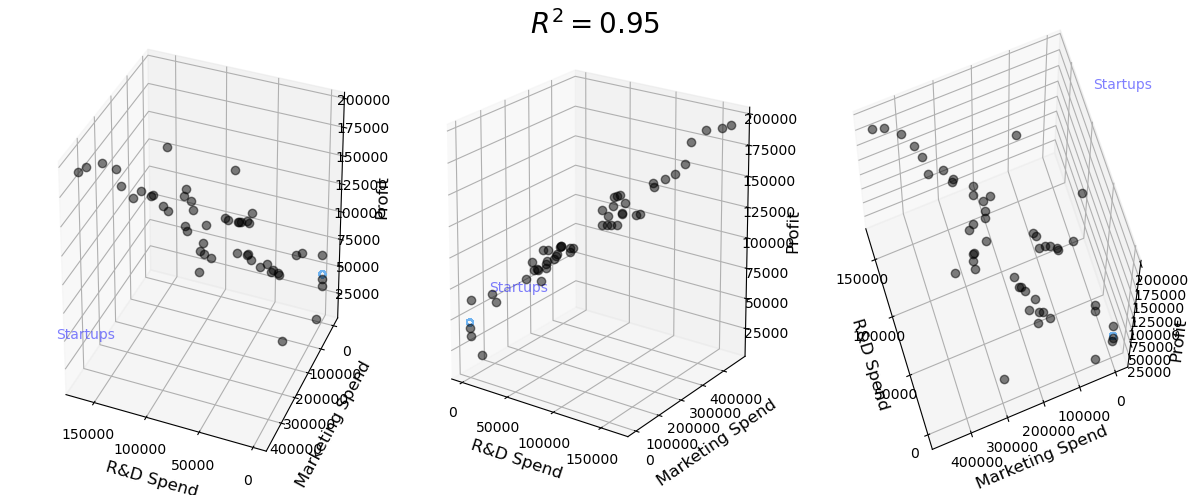

In [41]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('R&D Spend', fontsize=12)
    ax.set_ylabel('Marketing Spend', fontsize=12)
    ax.set_zlabel('Profit', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'Startups', fontsize=10, ha='center', va='center',
           transform=ax1.transAxes, color='blue', alpha=0.5)
ax2.text2D(0.3, 0.42, 'Startups', fontsize=10, ha='center', va='center',
           transform=ax2.transAxes, color='blue', alpha=0.5)
ax3.text2D(0.85, 0.85, 'Startups', fontsize=10, ha='center', va='center',
           transform=ax3.transAxes, color='blue', alpha=0.5)

ax1.view_init(elev=30, azim=112)
ax2.view_init(elev=18, azim=-55)
ax3.view_init(elev=65, azim=160)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

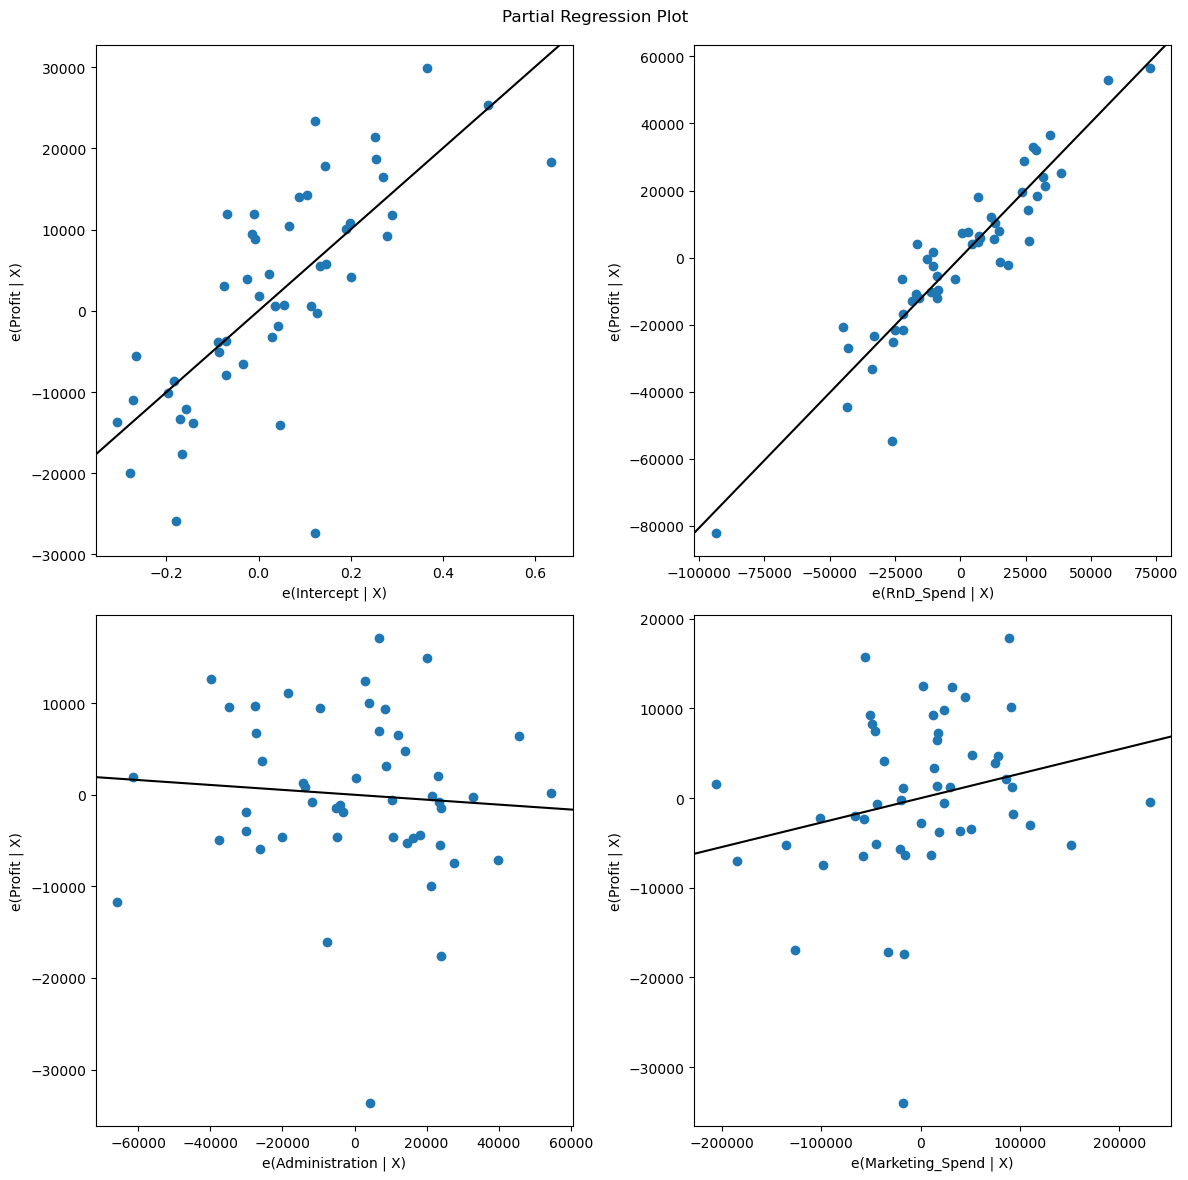

In [42]:
fig = plt.figure(figsize=(12,12))
fig = sm.graphics.plot_partregress_grid(model1, fig=fig)